In [1]:
import os, sys, glob
from matplotlib import pyplot as plt
from scipy.interpolate import RectBivariateSpline

sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_ProfilePlotting import *
from Lib_ProfileProcessing import *

from se2waveload import *

LocIni,LocEnd = [4000, -400], [4000, 400]
NumPoints = 1000
delta = 50.005 #not used

path = "/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/"
#path = "/home/nico/Documents/TEAR/Codes_TEAR/plot-utils_se2wave/se2wave/"
#path = "/media/nico/Elements/Simulations/20200728/SSCdeg2/"
#path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/20200729/TPV3-P1-Default/"
filename = os.path.join(path,"default_mesh_coor.pbin")

OutputFolder="/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"+GetTodayDate()+"/"
CreateFolder(OutputFolder)

se2_coor = se2wave_load_coordinates(filename)

# Change between specific timestep(file) or just the last one
LastTimeStep=False
if (LastTimeStep):
    files = glob.glob(os.path.join(path,"step-*_wavefield.pbin"))
    w_filename= sorted(files)[-1]
else:
    w_filename = os.path.join(path,"step-2000_wavefield.pbin")

# Load wavefield file
se2_field = se2wave_load_wavefield(w_filename,True,True)

# Separate field components into matrices
LCoorX, LCoorY = SeparateList(se2_coor['coor'], se2_coor['nx'].item(), se2_coor['ny'].item())
LFieldX, LFieldY = SeparateList(se2_field['vel'], se2_field['nx'].item(), se2_field['ny'].item())


FileNotFoundError: [Errno 2] No such file or directory: '/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/step-2000_wavefield.pbin'

In [2]:
def TiltDomain(angle,xComp,yComp):
    NewXComp = np.array(xComp) * np.cos(angle * np.pi / 180.0) + np.array(yComp) * np.sin(angle * np.pi / 180.0) 
    NewYComp = -np.array(xComp) * np.sin(angle * np.pi / 180.0) + np.array(yComp) * np.cos(angle * np.pi / 180.0) 
    return NewXComp, NewYComp
    

def Tilt_SeparateList(List2Sep,nx,ny,angle):
    TotNum = len(List2Sep)
    xComponent = List2Sep[0:TotNum:2]
    yComponent = List2Sep[1:TotNum:2]
    
    xComponent,yComponent = TiltDomain(angle,xComponent,yComponent)
    
    xComponent = np.reshape(xComponent, (nx, ny), "F")
    yComponent = np.reshape(yComponent, (nx, ny), "F")
    return xComponent,yComponent

In [3]:
LFieldX, LFieldY = Tilt_SeparateList(se2_field['vel'], se2_field['nx'].item(), se2_field['ny'].item(),90)

NameError: name 'se2_field' is not defined

In [ ]:
LFieldX

In [4]:
thickness=50
Locations1 = [[8000,thickness],[6000,thickness],[4000,thickness],[2000,thickness],[0,thickness]]

#Locations in the real domain
Locations2 = [list(ApplyTilting(90,Loc[0],Loc[1])) for Loc in Locations1]

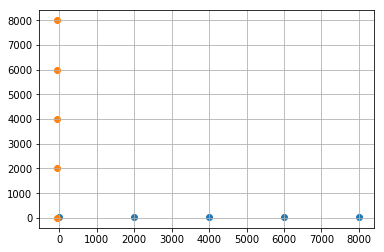

In [5]:
x1, y1 = zip(*Locations1)
x2, y2 = zip(*Locations2)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.grid()

In [ ]:
list(ApplyTilting(90,0,1))

In [ ]:
ApplyTilting(90,0,1)

In [ ]:
ApplyTilting(90,20,40)